<a href="https://colab.research.google.com/github/nishzsche/hr_data_analysis/blob/main/sequoia_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

## Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline


In [2]:
file_path = "/content/drive/MyDrive/Sequoia_Data_Science_Case_Study_Dataset.xls"
sheet_name = 'SequoiaDataScientist_Dataset'

hr_data = pd.read_excel(file_path, sheet_name = sheet_name)
hr_data.shape

(1470, 35)

# EDA

In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Turnover                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## What are the different datatypes in the dataset and how many in each?

In [4]:
pd.DataFrame(hr_data.dtypes, columns=['Dtype']).Dtype.value_counts()

int64     26
object     9
Name: Dtype, dtype: int64

## Can we split `Age` into bins? If so, how would be binning them?
  > We can bin the attribute into 7 ordinal groups
  

In [ ]:
hr_data['Age_cat'] = pd.cut(hr_data.Age, 
                            bins = list(range(18, 66, 6)), 
                            labels = list(range(7)))

hr_data.Age_cat.value_counts().sort_index()

0     89
1    289
2    412
3    293
4    182
5    128
6     69
Name: Age_cat, dtype: int64

## What are the unique values in the categorical columns?

1. What is their share in the population?
2. Are there opportunities to clean them?
> Answer: No, they don't seem to overlap

In [30]:
cat_cols = hr_data.select_dtypes(include = 'object').columns.to_list()
for cat_col in cat_cols:
    print(cat_col.upper() + ': ', end = "")
    print(', '.join(f"{index} - {round(count/len(hr_data)*100, 2)}" 
                    for index, count in hr_data[cat_col].
                    value_counts().
                    sort_values(ascending = False).
                    items()))

TURNOVER: No - 83.88, Yes - 16.12
BUSINESSTRAVEL: Travel_Rarely - 70.95, Travel_Frequently - 18.84, Non-Travel - 10.2
DEPARTMENT: Research & Development - 65.37, Sales - 30.34, Human Resources - 4.29
EDUCATIONFIELD: Life Sciences - 41.22, Medical - 31.56, Marketing - 10.82, Technical Degree - 8.98, Other - 5.58, Human Resources - 1.84
GENDER: Male - 60.0, Female - 40.0
JOBROLE: Sales Executive - 22.18, Research Scientist - 19.86, Laboratory Technician - 17.62, Manufacturing Director - 9.86, Healthcare Representative - 8.91, Manager - 6.94, Sales Representative - 5.65, Research Director - 5.44, Human Resources - 3.54
MARITALSTATUS: Married - 45.78, Single - 31.97, Divorced - 22.24
OVER18: Y - 100.0
OVERTIME: No - 71.7, Yes - 28.3


## How many attributes have just one unique value in them? i.e., STD = 0

Answer:

1. EmployeeCount
2. StandardHours
3. Over18

The above attributes can be dropped from the dataset

In [39]:
non_unique_cols = ['EmployeeCount', 'StandardHours', 'Over18']

hr_data.drop(non_unique_cols, axis = 1, inplace = True)
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Turnover                  1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

## Are there identifiers that can be dropped?

Answer: EmployeeNumber

In [44]:
hr_data.drop('EmployeeNumber', axis = 1, inplace = True)
hr_data.shape

(1470, 31)

## What is the turnover rate like?

In [40]:
(hr_data.Turnover.value_counts()/len(hr_data)).round(2)

No     0.84
Yes    0.16
Name: Turnover, dtype: float64

# Data Prep

## Convert string columns to categorical

In [41]:
for column in hr_data.select_dtypes(include = ["object"]).columns:
    hr_data[column] = hr_data[column].astype("category")

In [42]:
hr_data.select_dtypes('category').describe()

,Turnover,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


<ipython-input-45-effc2aa91f6b>:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,

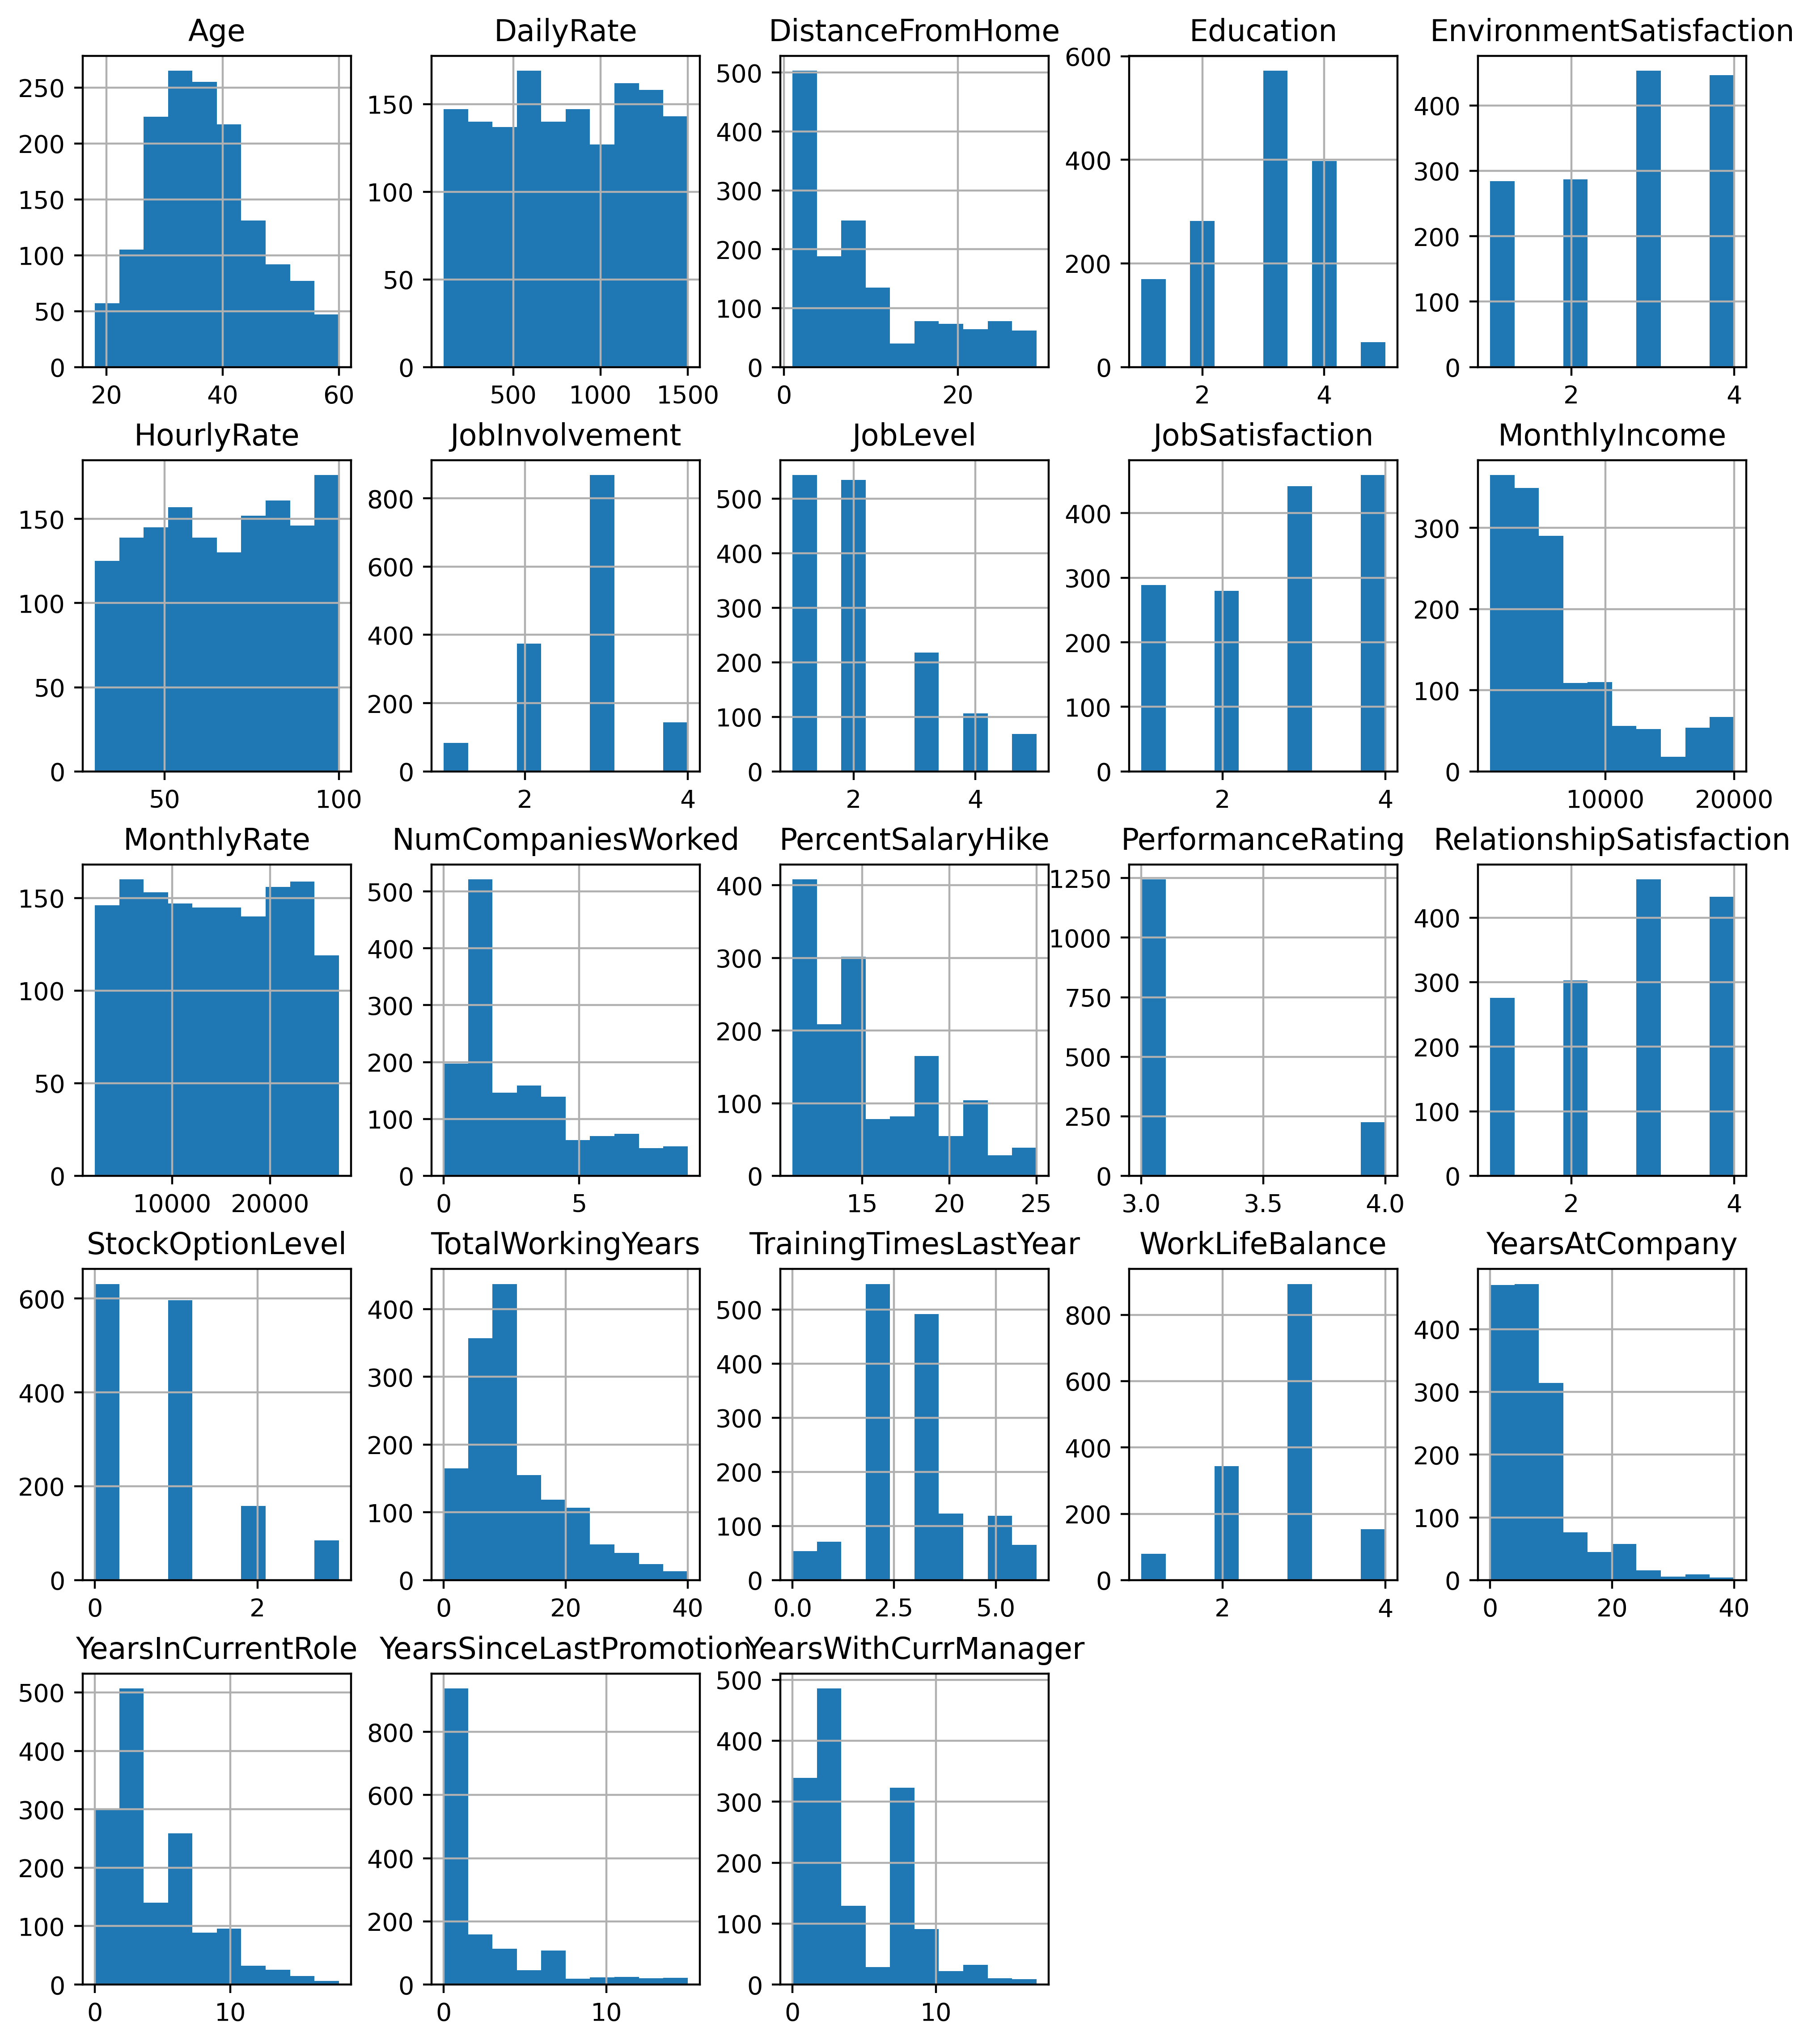

In [45]:
fig, ax = plt.subplots(figsize = (12, 14), dpi = 400)
hr_data.hist(ax = ax)

In [31]:
import plotly.express as px

<ipython-input-54-e4ec768cb2f7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

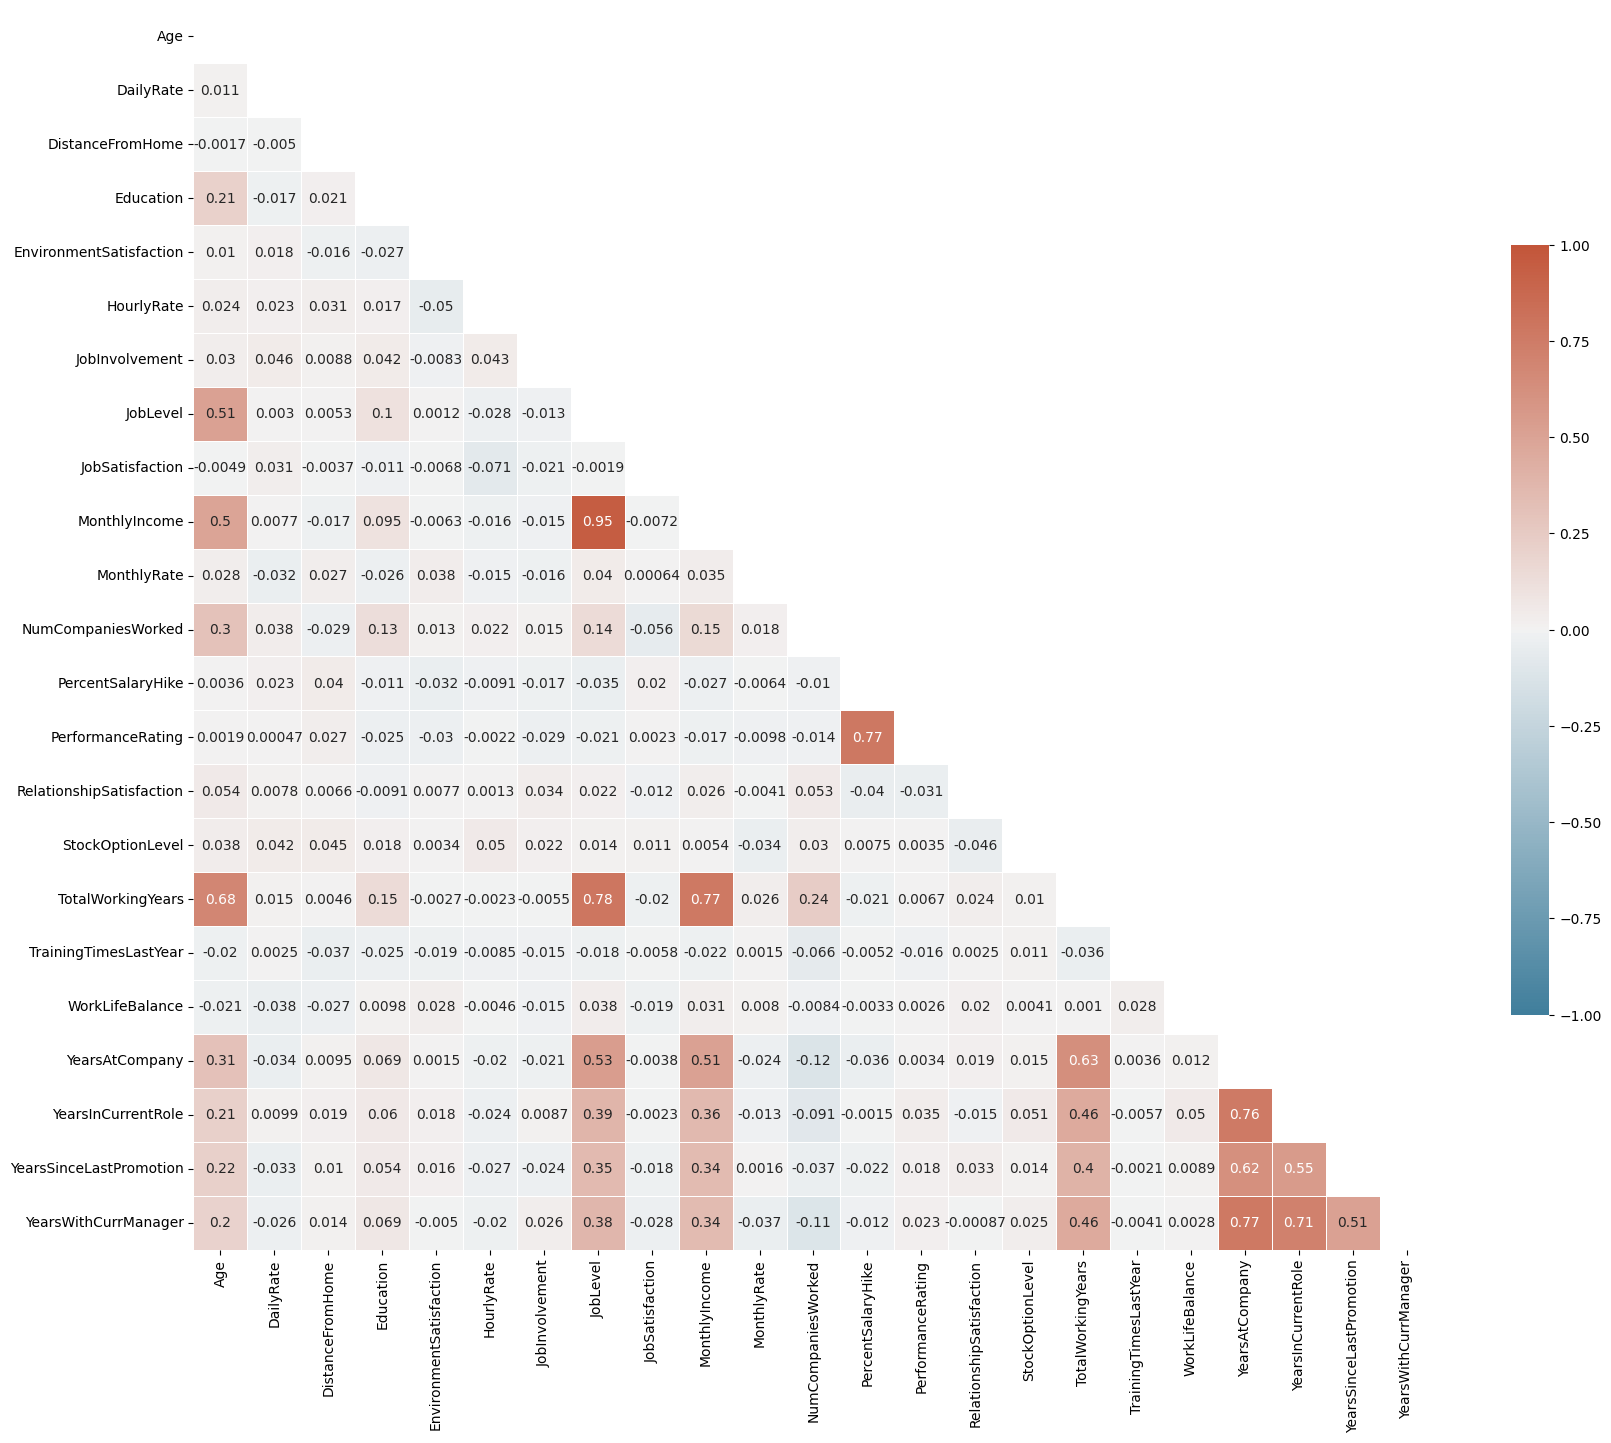

In [54]:
corr = hr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Observations

1. MonthlyIncome correlating most with JobLevel as expected
2. PerformanceRating correlates with PercentSalaryHike but not linearly it seems, perhaps differences in how different departments reward performances differently
3. TotalWorkingYears and JobLevel trend almost together but another candidate for scrutiny
4. 